# Николаев Алексей Алексекевич, группа 22.М08

# Задача 3. Многоклассовая классификация и множественная классификация/регрессия



-  Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

-  Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
-  Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
-  При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
-  Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
-  Замерить время обучения каждой модели для каждой стратегии.
-  Для оценки качества моделей используйте метрику **AUC-ROC**.
-  Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
-  * (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
-  * (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.


## 1. Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

In [2]:
%precision 4
import warnings
warnings.filterwarnings('ignore')

Для выполнения задачи был взят датасет Mobile Price Classification [тут](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?datasetId=11167&sortBy=voteCount&select=test.csv)

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Описание набора данных

- **battery_power**: Total energy a battery can store in one time measured in mAh
- **blue**: Has bluetooth or not
1 (Yes),
0 (No)
- **clock_speed**: speed at which microprocessor executes instructions
- **dual_sim**: Has dual sim support or not
1 (Yes),
0 (No)
- **fc**: Front Camera mega pixels
- **four_g**: Has 4G or not
1 (Yes),
0 (No)
- **int_memory**: Internal Memory in Gigabytes
- **m_dep**: Mobile Depth in cm
- **mobile_wt**: Weight of mobile phone
- **n_cores**: Number of cores of processor
- **pc**: Primary Camera mega pixels
- **px_height**: Pixel Resolution Height
- **px_width**: Pixel Resolution Width
- **ram**: Random Access Memory in Megabytes
- **sc_h**: Screen Height of mobile in cm
- **sc_w**: Screen Width of mobile in cm
- **talk_time**: longest time that a single battery charge will last when you are
- **three_g**: Has 3G or not
1 (Yes),
0 (No)
- **touch_screen**: Has touch screen or not
1 (Yes),
0 (No)
- **wifi**: Has wifi or not 
1 (Yes),
0 (No)
- **price_range**: This is the target variable with value of
0 (low cost),
1 (budgeted),
2 (medium cost),
3 (flagship)

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Пропущенные значения в датасете отсутствуют

In [6]:
df.shape

(2000, 21)

## Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации. При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Связь между мощностью батареи и ценой

<AxesSubplot: xlabel='price_range', ylabel='battery_power'>

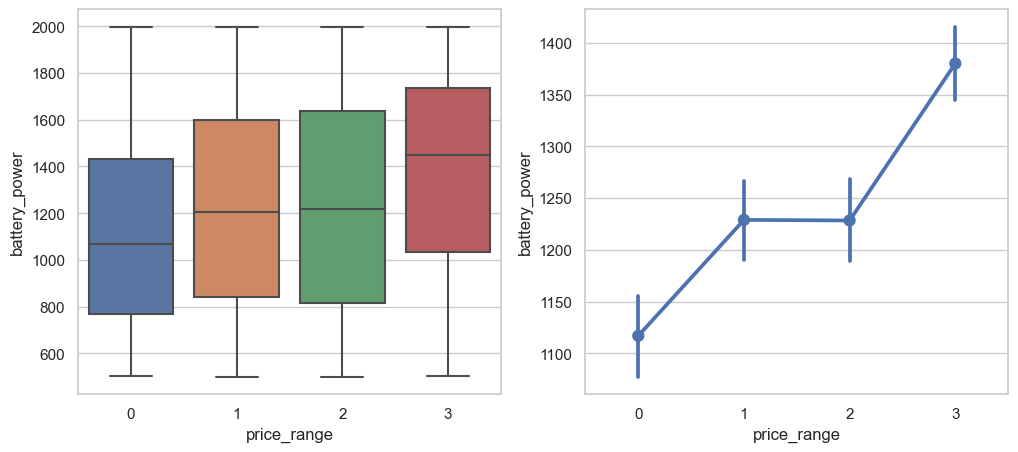

In [9]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='price_range',y='battery_power',data=df)
plt.subplot(1,2,2)
sns.pointplot(x='price_range',y='battery_power',data=df)

Связь между мощностью батареи и памятью

<AxesSubplot: xlabel='price_range', ylabel='int_memory'>

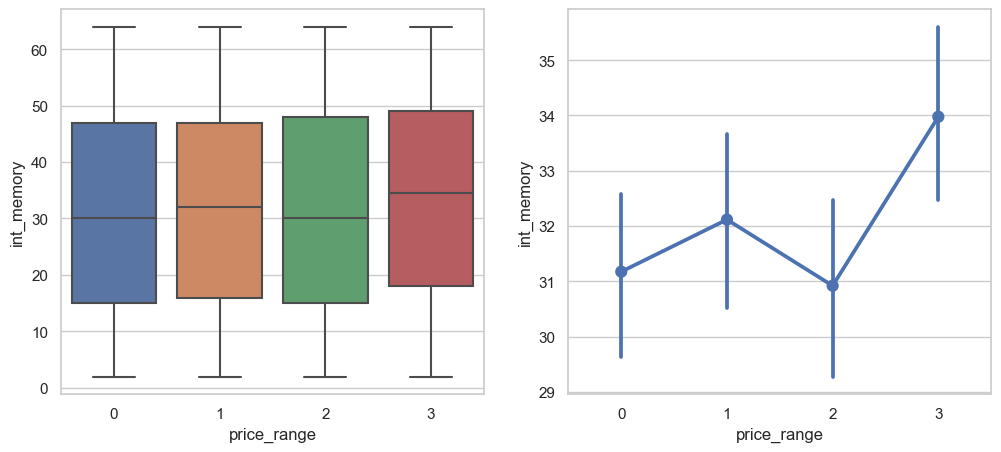

In [10]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='price_range',y='int_memory',data=df)
plt.subplot(1,2,2)
sns.pointplot(x='price_range',y='int_memory',data=df)

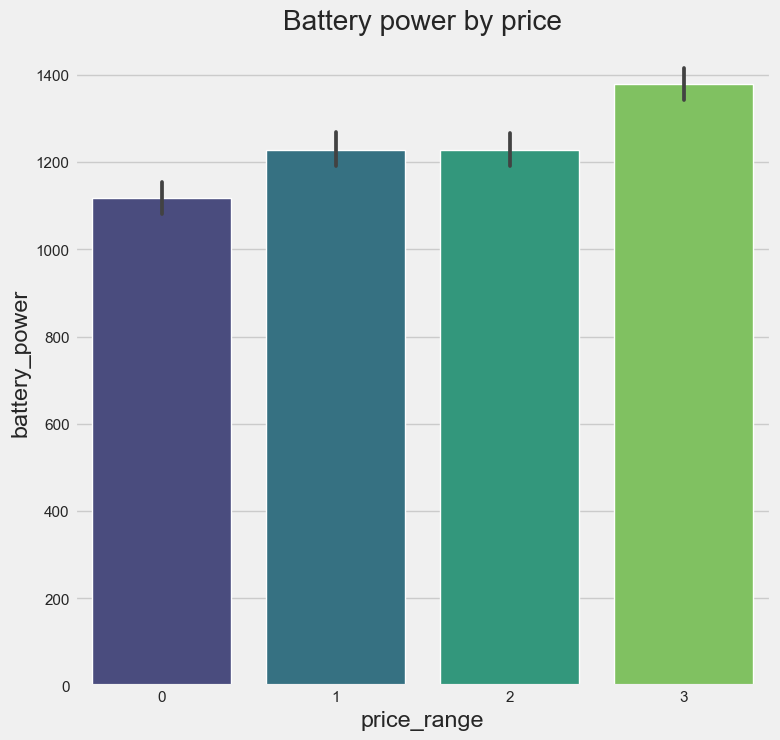

In [11]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Battery power by price")
sns.set(font_scale=1)
sns.barplot(data=df, y="battery_power",x="price_range",palette="viridis")
plt.show()

Связь между 3G, 4G и ценой

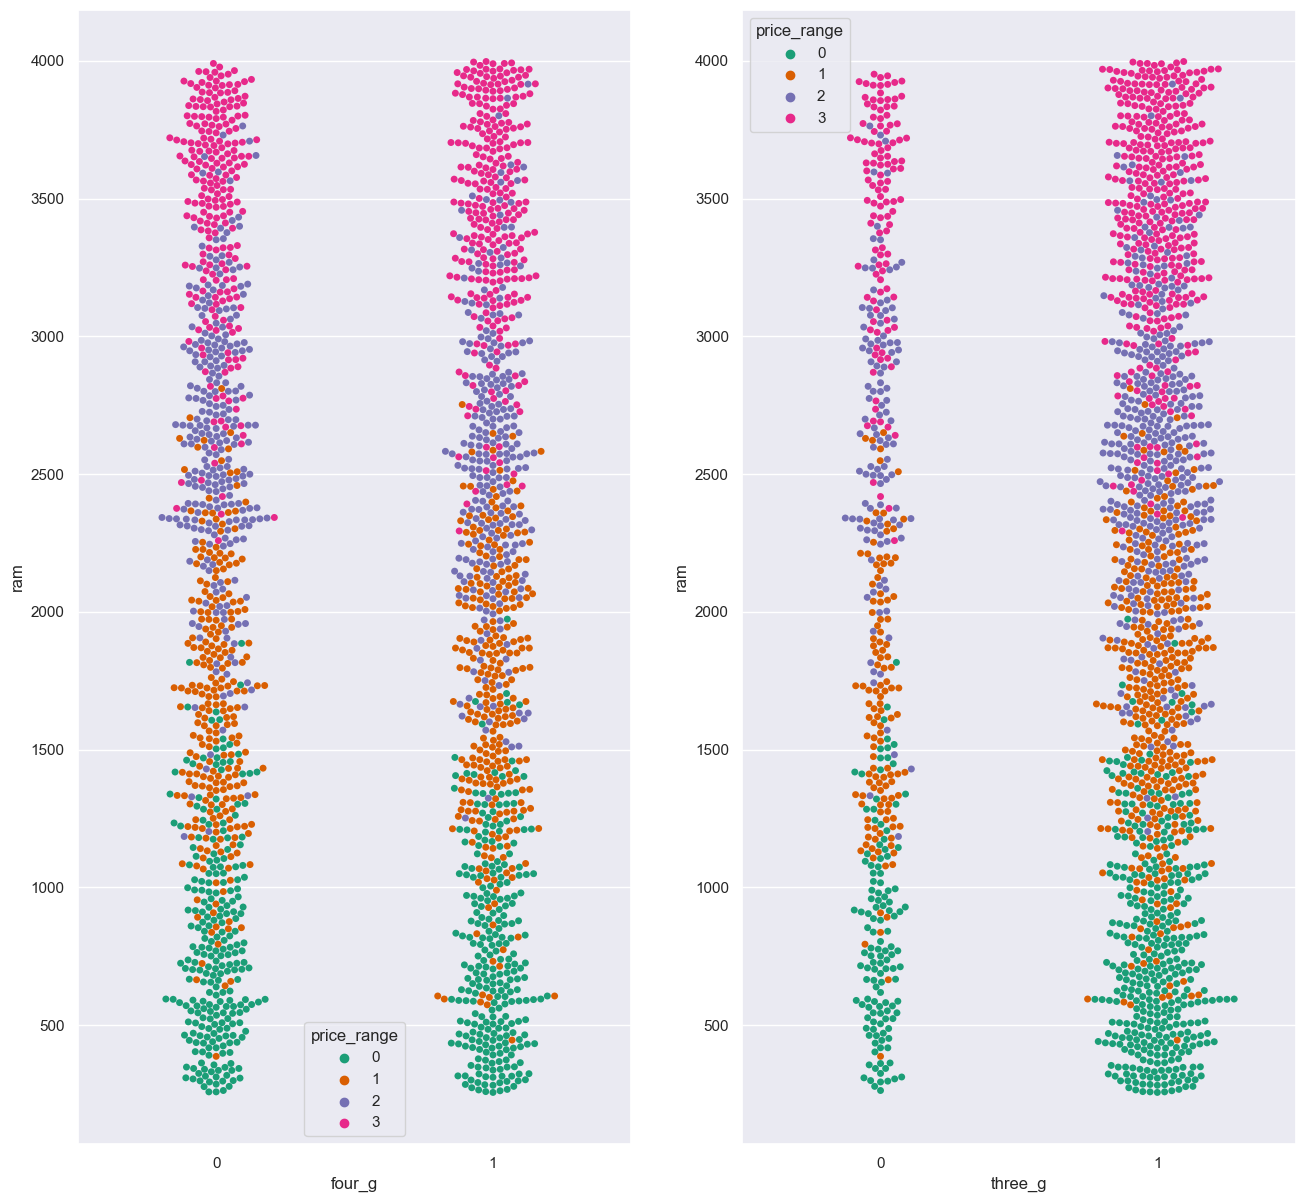

In [12]:
f, ax = plt.subplots(figsize=(14, 14))
plt.subplot(1,2,1)
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

plt.subplot(1,2,2)
ax=sns.swarmplot(x="three_g", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

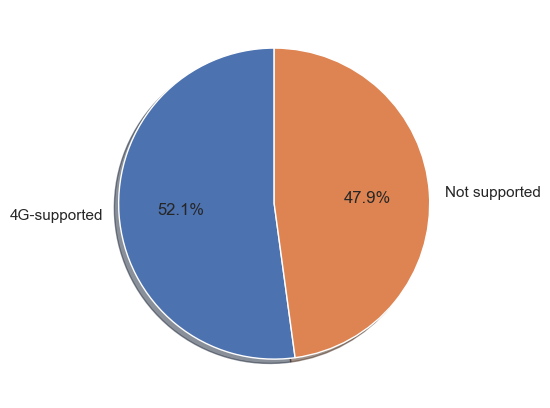

In [13]:
fig1, ax1 = plt.subplots()
columns =["4G-supported",'Not supported']
ax1.pie(df.four_g.value_counts().values, labels=columns, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

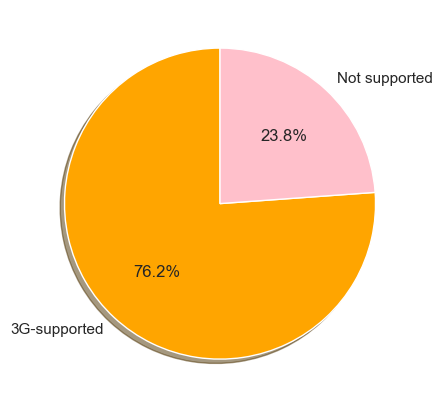

In [14]:
fig2, ax1 = plt.subplots()
columns =["3G-supported",'Not supported']
colors = ['orange', 'pink']
ax1.pie(df.three_g.value_counts().values, labels=columns, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.show()

Проверка корреляции путем построения графика корреляции.

Text(0.5, 1.0, 'Correlation ')

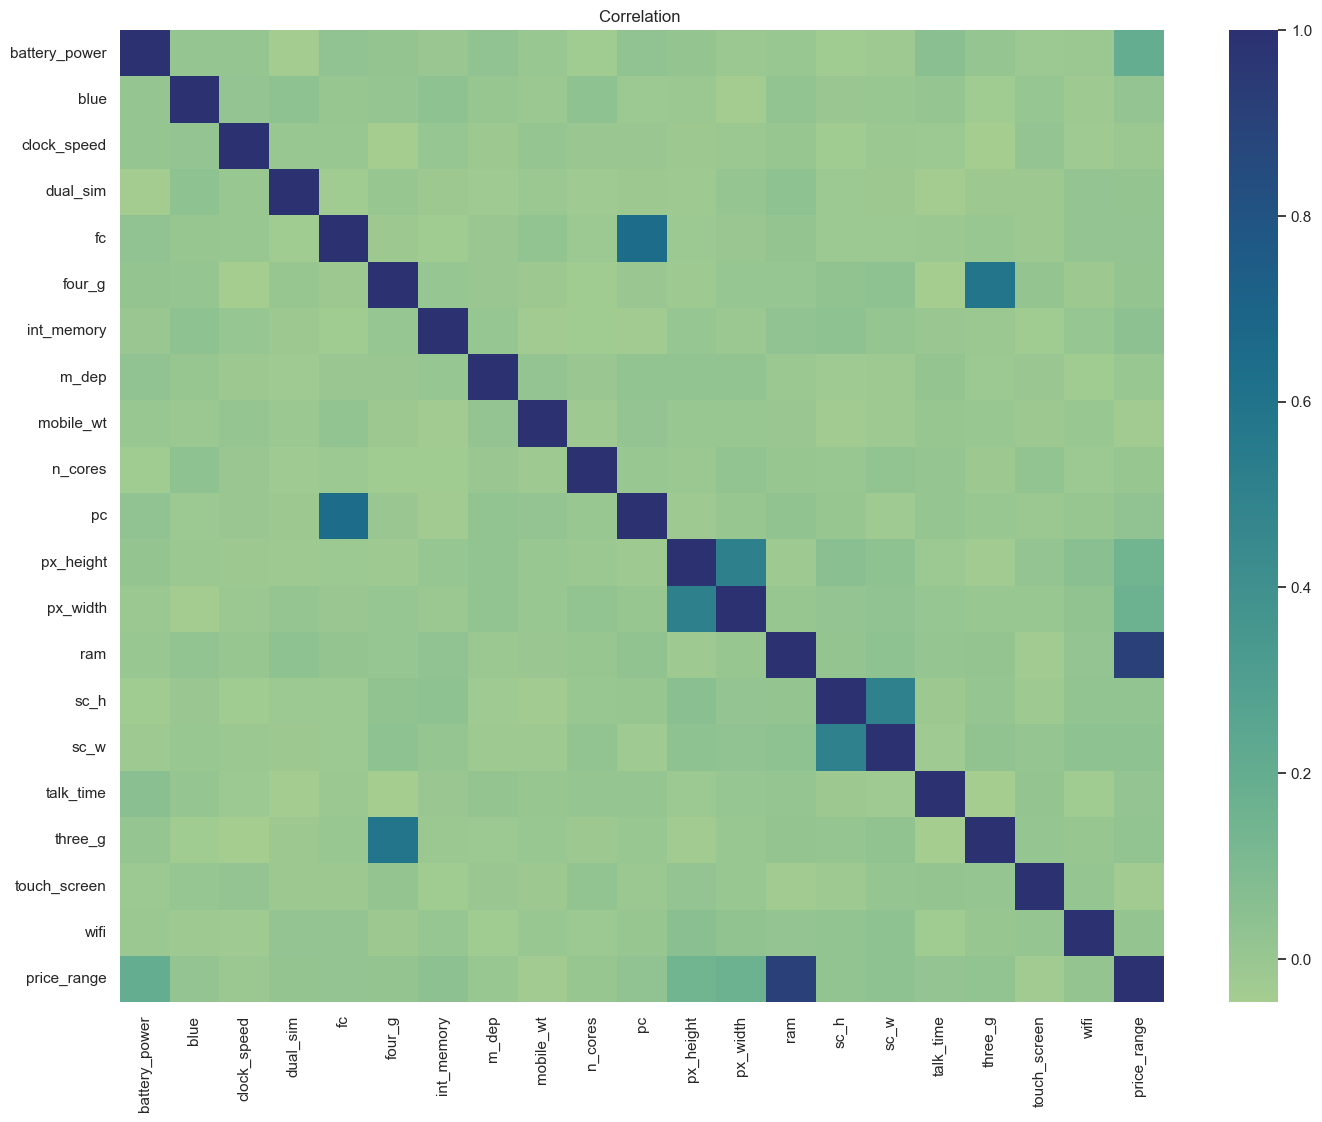

In [15]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='crest')
r.set_title("Correlation ")

 4G и 3G сильно коррелируют между собой
 Преобразования не нужны

## Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

### Разделим данные на обучающую и тестовую выборки

In [36]:
from sklearn.model_selection import train_test_split

y = df["price_range"]
x = df.drop(columns=["price_range"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

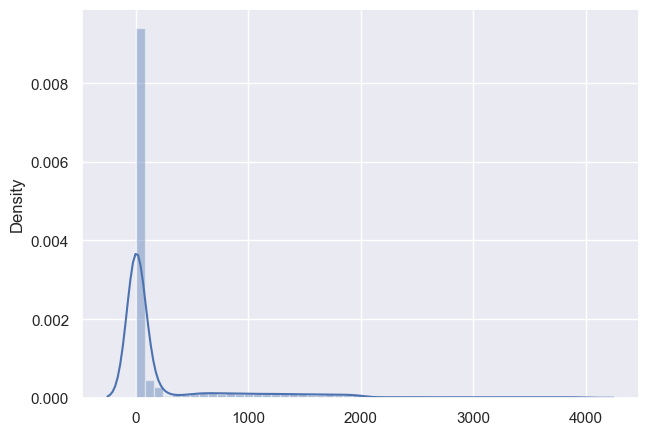

In [37]:
sns.distplot(x_train);

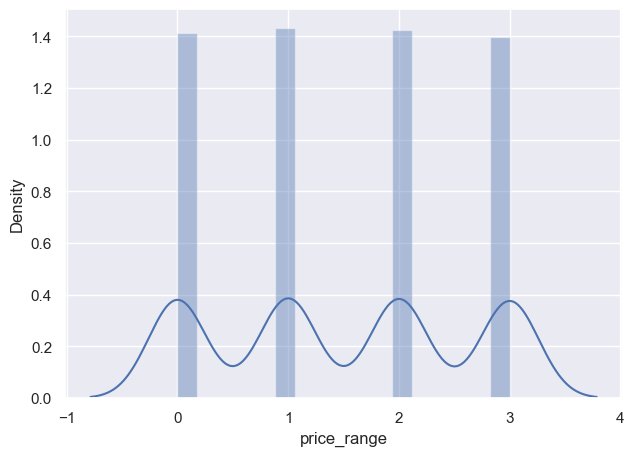

In [38]:
sns.distplot(y_train);

In [39]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
836,902,1,0.6,1,0,0,63,0.7,122,5,14,364,1360,3654,18,8,15,0,1,1
575,1197,1,0.5,1,9,0,20,0.1,129,5,10,214,1710,2885,19,7,14,1,1,1
557,1519,0,2.1,0,0,0,32,0.7,200,1,10,168,1239,2912,11,10,15,1,1,0
1235,1971,1,0.5,1,0,0,40,0.3,186,7,19,485,922,571,8,7,17,1,1,0
1360,882,0,0.7,1,9,1,28,0.2,151,6,16,248,884,751,19,11,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


In [40]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,1646,0,2.5,0,3,1,25,0.6,200,2,5,211,1608,686,8,6,11,1,1,0
353,1182,0,0.5,0,7,1,8,0.5,138,8,16,275,986,2563,19,17,19,1,0,0
1333,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0
905,989,1,2.0,0,4,0,17,0.2,166,3,19,256,1394,3892,18,7,19,1,1,0
1289,615,1,0.5,1,7,0,58,0.5,130,5,8,1021,1958,1906,14,5,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1216,0,3.0,0,4,0,47,0.4,199,3,7,1852,1967,2268,13,5,4,0,1,1
1554,1957,0,1.2,1,18,1,36,0.8,151,2,19,1194,1727,1115,16,2,18,1,0,1
1956,555,1,0.5,1,2,0,17,0.2,163,5,12,956,1010,343,19,14,3,0,1,1
925,1048,1,1.5,0,2,1,29,1.0,182,1,4,29,1670,2146,11,10,2,1,0,0


### Масштабирование данных

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
x_train_scaled

array([[-0.7638951 ,  1.01294087, -1.12231393, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-0.09785191,  1.01294087, -1.24355155, ...,  0.55534783,
         0.99146499,  1.00142959],
       [ 0.62915118, -0.98722446,  0.69625031, ...,  0.55534783,
         0.99146499, -0.99857245],
       ...,
       [ 1.32906098,  1.01294087, -1.24355155, ...,  0.55534783,
        -1.00860848,  1.00142959],
       [ 1.55032279, -0.98722446, -0.75860108, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-1.36672064,  1.01294087, -1.12231393, ...,  0.55534783,
        -1.00860848, -0.99857245]])

In [43]:
x_test_scaled

array([[ 0.91588842, -0.98722446,  1.18120077, ...,  0.55534783,
         0.99146499, -0.99857245],
       [-0.13171851, -0.98722446, -1.24355155, ...,  0.55534783,
        -1.00860848, -0.99857245],
       [ 1.6519226 , -0.98722446,  1.66615124, ...,  0.55534783,
         0.99146499, -0.99857245],
       ...,
       [-1.54734253,  1.01294087, -1.24355155, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-0.43426017,  1.01294087, -0.03117539, ...,  0.55534783,
        -1.00860848, -0.99857245],
       [-0.40490911,  1.01294087,  0.69625031, ...,  0.55534783,
         0.99146499, -0.99857245]])

### Подбор оптимальных признаков с помощью RFECV и кросс-валидация

In [44]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(5), scoring='accuracy')
labelencoder = LabelEncoder()
y_transform = labelencoder.fit_transform(y_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)
rfecv.fit(x_train_scaled_df, y_transform)

selected_features = list(x_train.columns[rfecv.support_])
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

Optimal number of features: 5
Selected features: ['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']


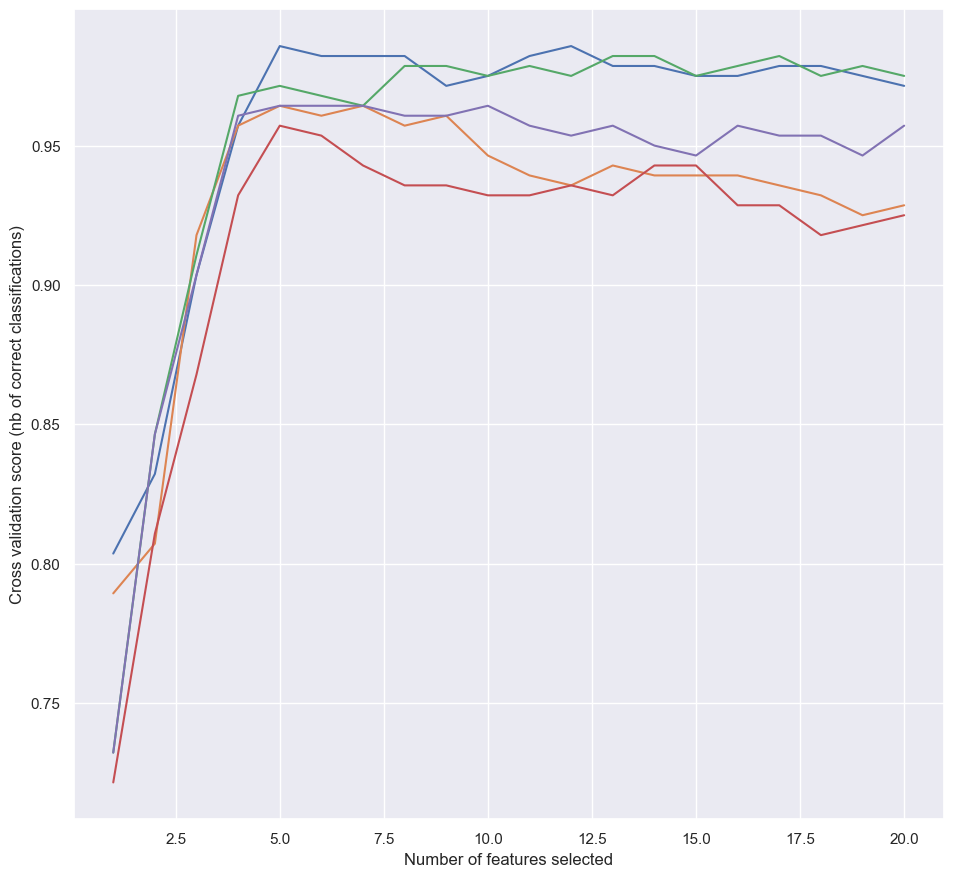

In [45]:
plt.figure(figsize=(10,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Стратегия OneVsRest

In [46]:
accuracies = {}
times = {}

### OneVsRest Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import time

lr_searcher = GridSearchCV(LogisticRegression(), [{'C': [0.001, 0.01, 0.1]}], cv=5, verbose=5)
lr_searcher.fit(x_train_scaled, y_train)
print(lr_searcher.best_params_)
print("Logistic Regression score =", lr_searcher.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...........................C=0.001;, score=0.686 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.664 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.668 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.711 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.661 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.821 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.736 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.796 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.757 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.725 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.914 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

In [48]:
ovr_lr = OneVsRestClassifier(LogisticRegression(C = 0.1))
start_time = time.time()
ovr_lr.fit(x_train_scaled, y_train)
ovr_lr_prediction = ovr_lr.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVR_LR accuracy: {accuracy_score(y_test, ovr_lr_prediction)}')
print(f'OVR_LR time: {spend_time}')
accuracies['OVR_LR'] = accuracy_score(y_test, ovr_lr_prediction)
times["OVR_LR"] = spend_time

OVR_LR accuracy: 0.7983333333333333
OVR_LR time: 0.017951488494873047


### OneVsRest KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_searcher = GridSearchCV(KNeighborsClassifier(), [{'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}], cv=5, verbose=5)
knn_searcher.fit(x_train_scaled, y_train)
print(knn_searcher.best_params_)
print("KNN score =", knn_searcher.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.443 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.425 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.389 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.421 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.418 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.439 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.468 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.436 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.436 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.429 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.461 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

In [50]:
ovr_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 7, weights = 'distance'))
start_time = time.time()
ovr_knn.fit(x_train_scaled, y_train)
ovr_knn_prediction = ovr_knn.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVR_KNN accuracy: {accuracy_score(y_test, ovr_knn_prediction)}')
print(f'OVR_KNN time: {spend_time}')

accuracies['OVR_KNN'] = accuracy_score(y_test, ovr_knn_prediction)
times["OVR_KNN"] = spend_time

OVR_KNN accuracy: 0.5566666666666666
OVR_KNN time: 0.05385637283325195


### OneVsRest SVM

In [51]:
from sklearn.svm import SVC

svm_searcher = GridSearchCV(SVC(), [{'C': [0.0001, 0.01, 0.1], 'kernel': ['linear', 'rbf', 'sigmoid']}], cv=5, verbose=5)
svm_searcher.fit(x_train_scaled, y_train)
print(svm_searcher.best_params_)
print("SVM score =", svm_searcher.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...........C=0.0001, kernel=linear;, score=0.250 total time=   0.0s
[CV 2/5] END ...........C=0.0001, kernel=linear;, score=0.254 total time=   0.0s
[CV 3/5] END ...........C=0.0001, kernel=linear;, score=0.254 total time=   0.0s
[CV 4/5] END ...........C=0.0001, kernel=linear;, score=0.254 total time=   0.0s
[CV 5/5] END ...........C=0.0001, kernel=linear;, score=0.254 total time=   0.0s
[CV 1/5] END ..............C=0.0001, kernel=rbf;, score=0.250 total time=   0.0s
[CV 2/5] END ..............C=0.0001, kernel=rbf;, score=0.254 total time=   0.0s
[CV 3/5] END ..............C=0.0001, kernel=rbf;, score=0.254 total time=   0.0s
[CV 4/5] END ..............C=0.0001, kernel=rbf;, score=0.254 total time=   0.0s
[CV 5/5] END ..............C=0.0001, kernel=rbf;, score=0.254 total time=   0.0s
[CV 1/5] END ..........C=0.0001, kernel=sigmoid;, score=0.250 total time=   0.0s
[CV 2/5] END ..........C=0.0001, kernel=sigmoid;,

In [52]:
ovr_svm = OneVsRestClassifier(SVC(C = 0.1, kernel = 'linear'))
start_time = time.time()
ovr_svm.fit(x_train_scaled, y_train)
ovr_svm_prediction = ovr_svm.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVR_SVM accuracy: {accuracy_score(y_test, ovr_svm_prediction)}')
print(f'OVR_SVM time: {spend_time}')

accuracies['OVR_SVM'] = accuracy_score(y_test, ovr_svm_prediction)
times["OVR_SVM"] = spend_time

OVR_SVM accuracy: 0.71
OVR_SVM time: 0.09275150299072266


### OneVsRest Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb_searcher = GridSearchCV(GaussianNB(), [{"var_smoothing": np.logspace(0, -10, num=40)}], cv=5, verbose=5)
nb_searcher.fit(x_train_scaled, y_train)
print(nb_searcher.best_params_)
print("Naive Bayes score =", nb_searcher.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.779 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.754 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.832 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.736 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.700 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.5541020330009492;, score=0.804 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.5541020330009492;, score=0.768 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.5541020330009492;, score=0.821 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.5541020330009492;, score=0.761 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.5541020330009492;, score=0.729 total time=   0.0s
[CV 1/5] END .var_smoothing=0.30702906297578497;, score=0.829 total time=   0.0s
[CV 2/5] END .var_smoothing=0.30702906297578497

[CV 4/5] END var_smoothing=6.235507341273925e-09;, score=0.761 total time=   0.0s
[CV 5/5] END var_smoothing=6.235507341273925e-09;, score=0.789 total time=   0.0s
[CV 1/5] END var_smoothing=3.4551072945922323e-09;, score=0.811 total time=   0.0s
[CV 2/5] END var_smoothing=3.4551072945922323e-09;, score=0.818 total time=   0.0s
[CV 3/5] END var_smoothing=3.4551072945922323e-09;, score=0.793 total time=   0.0s
[CV 4/5] END var_smoothing=3.4551072945922323e-09;, score=0.761 total time=   0.0s
[CV 5/5] END var_smoothing=3.4551072945922323e-09;, score=0.789 total time=   0.0s
[CV 1/5] END var_smoothing=1.9144819761699614e-09;, score=0.811 total time=   0.0s
[CV 2/5] END var_smoothing=1.9144819761699614e-09;, score=0.818 total time=   0.0s
[CV 3/5] END var_smoothing=1.9144819761699614e-09;, score=0.793 total time=   0.0s
[CV 4/5] END var_smoothing=1.9144819761699614e-09;, score=0.761 total time=   0.0s
[CV 5/5] END var_smoothing=1.9144819761699614e-09;, score=0.789 total time=   0.0s
[CV 1/

In [54]:
ovr_nb = OneVsRestClassifier(GaussianNB(var_smoothing = 0.09426684551178854))
start_time = time.time()
ovr_nb.fit(x_train_scaled, y_train)
ovr_nb_prediction = ovr_nb.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVR_NB accuracy: {accuracy_score(y_test, ovr_nb_prediction)}')
print(f'OVR_NB time: {spend_time}')

accuracies['OVR_NB'] = accuracy_score(y_test, ovr_nb_prediction)
times["OVR_NB"] = spend_time

OVR_NB accuracy: 0.795
OVR_NB time: 0.005984306335449219


### OneVsRest Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt_searcher = GridSearchCV(DecisionTreeClassifier(), [{'criterion': ['gini', 'entropy'],
                                                        'max_depth': [3,5,10,15,20],
                                                        "min_samples_split": [2, 4, 6],
                                                        "min_samples_leaf": [2, 3, 4],
                                                        "max_features": [2, 4, 6]}], cv=5, verbose=5)
dt_searcher.fit(x_train_scaled, y_train)
print(dt_searcher.best_params_)
print("Decision Tree score =", dt_searcher.best_score_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.446 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.236 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.296 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.271 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.396 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=4;, score=0.529 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=4;, score=0.257 total time=   0.0s
[CV 3/5] END criter

[CV 5/5] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.268 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4;, score=0.396 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4;, score=0.596 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4;, score=0.464 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4;, score=0.386 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4;, score=0.504 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=6;, score=0.507 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, min_s

[CV 3/5] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=6;, score=0.468 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=6;, score=0.621 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=6;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.432 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.393 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.471 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2;, score=0.364 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=2, 

[CV 1/5] END criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.686 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.689 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.689 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, min_samples_split=2;, score=0.789 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=6, min_samples_leaf=3, min_samples_split=2;, score=0.664 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=6, min_samples_leaf=

[CV 3/5] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=2;, score=0.514 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.679 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.661 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.732 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.546 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=4, min_samples_leaf=

[CV 5/5] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4;, score=0.418 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=6;, score=0.425 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=6;, score=0.464 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=6;, score=0.425 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=6;, score=0.443 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=6;, score=0.357 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2;, score=0.507 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, max_features=2, min_samples_leaf=

[CV 3/5] END criterion=gini, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.757 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.725 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, max_features=6, min_samples_leaf=3, min_samples_split=2;, score=0.671 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, max_features=6, min_samples_leaf=3, min_samples_split=2;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, max_features=6, min_samples_leaf=3, min_samples_split=2;, score=0.789 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, max_features=6, min_samples_leaf=3, min_samples_split=2;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, max_features=6, min_samples_leaf=

[CV 1/5] END criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=4;, score=0.739 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=4;, score=0.325 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=4;, score=0.596 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=4;, score=0.536 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=4;, score=0.250 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=6;, score=0.414 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=6;, score=0.468 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=4, m

[CV 4/5] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2;, score=0.557 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=2;, score=0.329 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.511 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.664 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.482 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.486 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=4;, score=0.536 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=4, m

[CV 1/5] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4;, score=0.661 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4;, score=0.439 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4;, score=0.286 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4;, score=0.332 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4;, score=0.532 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.450 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.636 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_featu

[CV 2/5] END criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.739 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.729 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.671 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.711 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_featu

[CV 2/5] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.396 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.557 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.521 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.432 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2;, score=0.339 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2;, score=0.486 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=2;, score=0.364 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_featu

[CV 1/5] END criterion=entropy, max_depth=15, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.511 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.646 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.721 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.818 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=6, min_samples_leaf=2, min_samples_split=6;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_featu

[CV 1/5] END criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.543 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.675 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.432 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.414 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=6;, score=0.557 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2;, score=0.368 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2;, score=0.371 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_featu

[CV 2/5] END criterion=entropy, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2;, score=0.704 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2;, score=0.725 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.700 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=4;, score=0.707 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_featu

In [56]:
ovr_dt = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'entropy',
                                                    max_depth = 20,
                                                    max_features = 6,
                                                    min_samples_leaf = 2,
                                                    min_samples_split = 4))
start_time = time.time()
ovr_dt.fit(x_train_scaled, y_train)
ovr_dt_prediction = ovr_dt.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVR_DT accuracy: {accuracy_score(y_test, ovr_dt_prediction)}')
print(f'OVR_DT time: {spend_time}')

accuracies['OVR_DT'] = accuracy_score(y_test, ovr_dt_prediction)
times["OVR_DT"] = spend_time

OVR_DT accuracy: 0.6666666666666666
OVR_DT time: 0.019945144653320312


## OneVsOne

In [57]:
from sklearn.multiclass import OneVsOneClassifier

### OneVsOne Logistic Regression

In [58]:
ovo_lr = OneVsOneClassifier(LogisticRegression(C = 0.1))
start_time = time.time()
ovo_lr.fit(x_train_scaled, y_train)
ovo_lr_prediction = ovo_lr.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVO_LR accuracy: {accuracy_score(y_test, ovo_lr_prediction)}')
print(f'OVO_LR time: {spend_time}')
accuracies['OVO_LR'] = accuracy_score(y_test, ovo_lr_prediction)
times["OVO_LR"] = spend_time

OVO_LR accuracy: 0.9483333333333334
OVO_LR time: 0.035903215408325195


### OneVsOne KNN

In [59]:
ovo_knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors = 7, weights = 'distance'))
start_time = time.time()
ovo_knn.fit(x_train_scaled, y_train)
ovo_knn_prediction = ovo_knn.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVO_KNN accuracy: {accuracy_score(y_test, ovo_knn_prediction)}')
print(f'OVO_KNN time: {spend_time}')

accuracies['OVO_KNN'] = accuracy_score(y_test, ovo_knn_prediction)
times["OVO_KNN"] = spend_time

OVO_KNN accuracy: 0.5566666666666666
OVO_KNN time: 0.10272598266601562


### OneVsOne SVM

In [60]:
ovo_svm = OneVsOneClassifier(SVC(C = 0.1, kernel = 'linear'))
start_time = time.time()
ovo_svm.fit(x_train_scaled, y_train)
ovo_svm_prediction = ovo_svm.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVO_SVM accuracy: {accuracy_score(y_test, ovo_svm_prediction)}')
print(f'OVO_SVM time: {spend_time}')

accuracies['OVO_SVM'] = accuracy_score(y_test, ovo_svm_prediction)
times["OVO_SVM"] = spend_time

OVO_SVM accuracy: 0.9383333333333334
OVO_SVM time: 0.051860809326171875


### OneVsOne Naive Bayes

In [61]:
ovo_nb = OneVsOneClassifier(GaussianNB(var_smoothing = 0.09426684551178854))
start_time = time.time()
ovo_nb.fit(x_train_scaled, y_train)
ovo_nb_prediction = ovo_nb.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVO_NB accuracy: {accuracy_score(y_test, ovo_nb_prediction)}')
print(f'OVO_NB time: {spend_time}')

accuracies['OVO_NB'] = accuracy_score(y_test, ovo_nb_prediction)
times["OVO_NB"] = spend_time

OVO_NB accuracy: 0.8133333333333334
OVO_NB time: 0.007974624633789062


### OneVsOne Decision Tree

In [62]:
ovo_dt = OneVsOneClassifier(DecisionTreeClassifier(criterion = 'entropy',
                                                    max_depth = 20,
                                                    max_features = 6,
                                                    min_samples_leaf = 2,
                                                    min_samples_split = 4))
start_time = time.time()
ovo_dt.fit(x_train_scaled, y_train)
ovo_dt_prediction = ovo_dt.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OVO_DT accuracy: {accuracy_score(y_test, ovo_dt_prediction)}')
print(f'OVO_DT time: {spend_time}')

accuracies['OVO_DT'] = accuracy_score(y_test, ovo_dt_prediction)
times["OVO_DT"] = spend_time

OVO_DT accuracy: 0.7483333333333333
OVO_DT time: 0.013470888137817383


## OutputCode

In [63]:
from sklearn.multiclass import OutputCodeClassifier

### OutputCode Logistic Regression

In [64]:
oc_lr = OutputCodeClassifier(LogisticRegression(C = 0.1))
start_time = time.time()
oc_lr.fit(x_train_scaled, y_train)
oc_lr_prediction = oc_lr.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OC_LR accuracy: {accuracy_score(y_test, oc_lr_prediction)}')
print(f'OC_LR time: {spend_time}')
accuracies['OC_LR'] = accuracy_score(y_test, oc_lr_prediction)
times["OC_LR"] = spend_time

OC_LR accuracy: 0.715
OC_LR time: 0.01795172691345215


### OutputCode KNN

In [65]:
oc_knn = OutputCodeClassifier(KNeighborsClassifier(n_neighbors = 7, weights = 'distance'))
start_time = time.time()
oc_knn.fit(x_train_scaled, y_train)
oc_knn_prediction = oc_knn.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OC_KNN accuracy: {accuracy_score(y_test, oc_knn_prediction)}')
print(f'OC_KNN time: {spend_time}')

accuracies['OC_KNN'] = accuracy_score(y_test, oc_knn_prediction)
times["OC_KNN"] = spend_time

OC_KNN accuracy: 0.49166666666666664
OC_KNN time: 0.058843374252319336


### OutputCode SVM

In [66]:
oc_svm = OutputCodeClassifier(SVC(C = 0.1, kernel = 'linear'))
start_time = time.time()
oc_svm.fit(x_train_scaled, y_train)
oc_svm_prediction = oc_svm.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OC_SVM accuracy: {accuracy_score(y_test, oc_svm_prediction)}')
print(f'OC_SVM time: {spend_time}')

accuracies['OC_SVM'] = accuracy_score(y_test, oc_svm_prediction)
times["OC_SVM"] = spend_time

OC_SVM accuracy: 0.51
OC_SVM time: 0.13463973999023438


### OutputCode Naive Bayes

In [67]:
oc_nb = OutputCodeClassifier(GaussianNB(var_smoothing = 0.09426684551178854))
start_time = time.time()
oc_nb.fit(x_train_scaled, y_train)
oc_nb_prediction = oc_nb.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OC_NB accuracy: {accuracy_score(y_test, oc_nb_prediction)}')
print(f'OC_NB time: {spend_time}')

accuracies['OC_NB'] = accuracy_score(y_test, oc_nb_prediction)
times["OC_NB"] = spend_time

OC_NB accuracy: 0.7166666666666667
OC_NB time: 0.00698089599609375


### OutputCode Decision Tree

In [68]:
oc_dt = OutputCodeClassifier(DecisionTreeClassifier(criterion = 'entropy',
                                                    max_depth = 20,
                                                    max_features = 6,
                                                    min_samples_leaf = 2,
                                                    min_samples_split = 4))
start_time = time.time()
oc_dt.fit(x_train_scaled, y_train)
oc_dt_prediction = oc_dt.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'OC_DT accuracy: {accuracy_score(y_test, oc_dt_prediction)}')
print(f'OC_DT time: {spend_time}')

accuracies['OC_DT'] = accuracy_score(y_test, oc_dt_prediction)
times["OC_DT"] = spend_time

OC_DT accuracy: 0.7266666666666667
OC_DT time: 0.016954421997070312


### Сравнение обученных моделей

In [69]:
accuracies

{'OVR_LR': 0.7983,
 'OVR_KNN': 0.5567,
 'OVR_SVM': 0.7100,
 'OVR_NB': 0.7950,
 'OVR_DT': 0.6667,
 'OVO_LR': 0.9483,
 'OVO_KNN': 0.5567,
 'OVO_SVM': 0.9383,
 'OVO_NB': 0.8133,
 'OVO_DT': 0.7483,
 'OC_LR': 0.7150,
 'OC_KNN': 0.4917,
 'OC_SVM': 0.5100,
 'OC_NB': 0.7167,
 'OC_DT': 0.7267}

In [70]:
times

{'OVR_LR': 0.0180,
 'OVR_KNN': 0.0539,
 'OVR_SVM': 0.0928,
 'OVR_NB': 0.0060,
 'OVR_DT': 0.0199,
 'OVO_LR': 0.0359,
 'OVO_KNN': 0.1027,
 'OVO_SVM': 0.0519,
 'OVO_NB': 0.0080,
 'OVO_DT': 0.0135,
 'OC_LR': 0.0180,
 'OC_KNN': 0.0588,
 'OC_SVM': 0.1346,
 'OC_NB': 0.0070,
 'OC_DT': 0.0170}

#### Качество

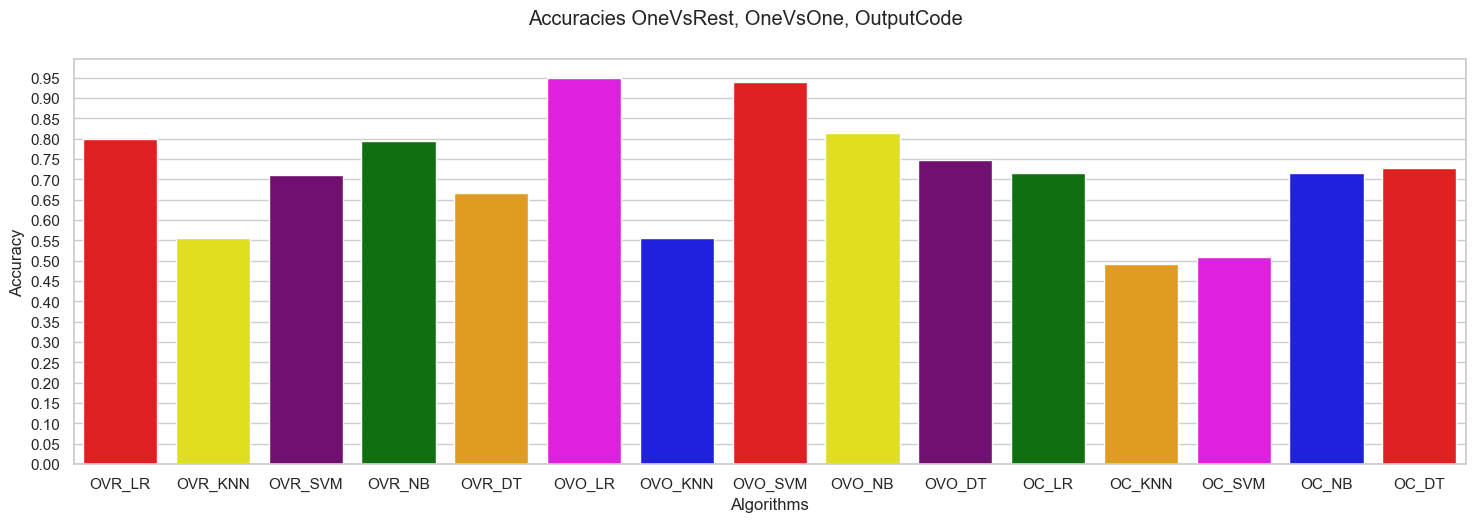

In [71]:
colors = ["red", "yellow", "purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.suptitle('Accuracies OneVsRest, OneVsOne, OutputCode')
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

#### Время

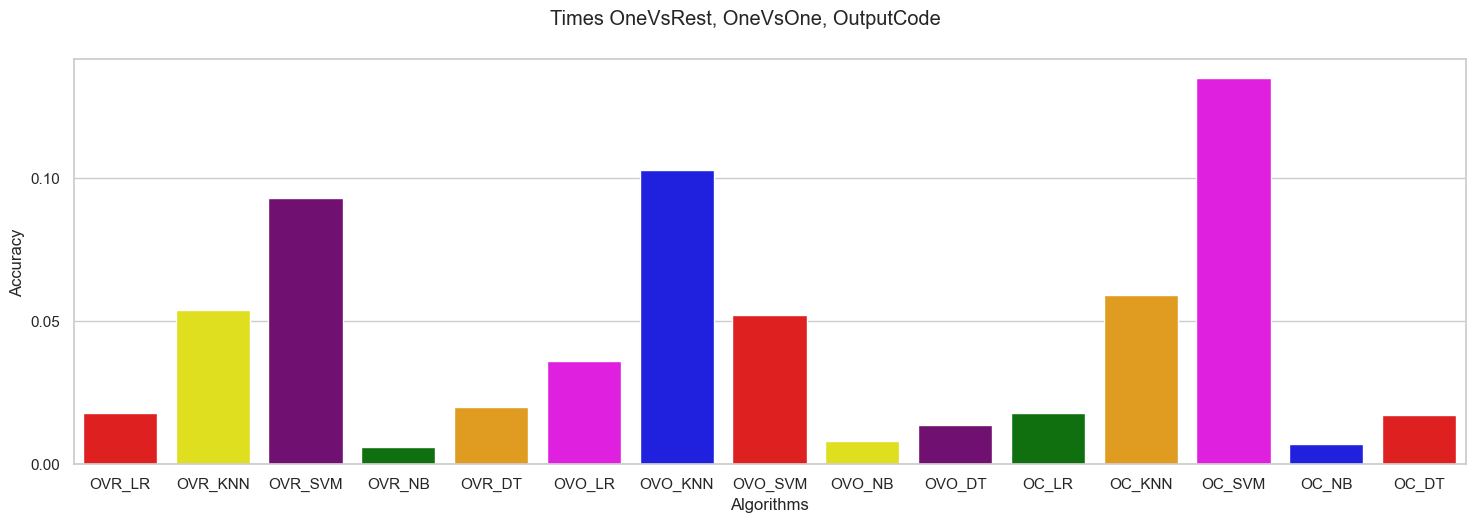

In [72]:
colors = ["red", "yellow", "purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.suptitle('Times OneVsRest, OneVsOne, OutputCode')
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(times.keys()), y=list(times.values()), palette=colors)
plt.show()

### Выводы:

- Наибольшую точность среди всех моделей показала стратегия OneVsOne. 
- Наименьшую точность среди всех моделей показала стратегия OutputCode. 
- Наименьшее время исполнения среди всех моделей показала стратегия OneVsRest. 
- Наибольшее время исполнения среди всех моделей показала стратегия OutputCode. 
- Лучший результат по точности среди всех моделей показал метод LogisticRegression со стратегией OneVsOne.
- Лучший результат по времени среди всех моделей показал метод Naive Bayes со стратегией OneVsRest.
- Худший результат по точности среди всех моделей показал метод со KNN со стратегией OutputCode.
- Худший результат по времени среди всех моделей показал метод со SVM со стратегией OutputCode.

## Повторить все пункты для задачи Multilabel classification (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать MultiOutputClassifier и ClassifierChain

In [73]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [74]:
y = df[["four_g", "three_g"]]
x = df.drop(columns=["four_g", "three_g"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

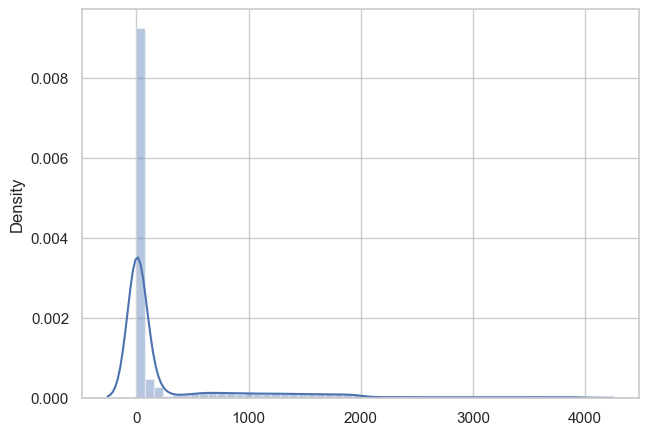

In [75]:
sns.distplot(x_train);

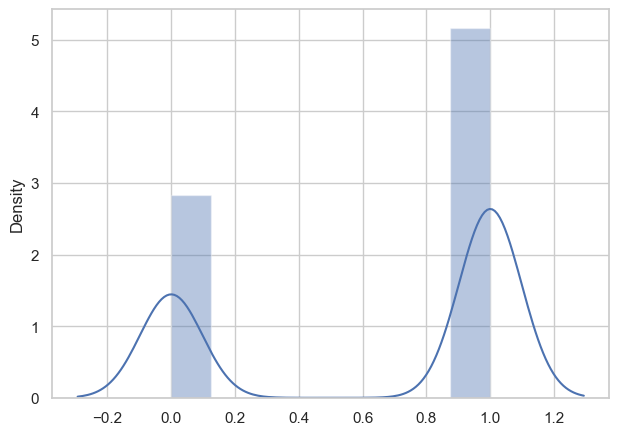

In [76]:
sns.distplot(y_train);

In [77]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## MultiOutputClassifier 

In [78]:
accuracies_MOC = {}
times_MOC = {}

In [79]:
from sklearn.multioutput import MultiOutputClassifier

###  Logistic Regression

In [80]:
moc_lr = MultiOutputClassifier(LogisticRegression(C = 0.1))
start_time = time.time()
moc_lr.fit(x_train_scaled, y_train)
moc_lr_prediction = moc_lr.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'MOC_LR accuracy: {accuracy_score(y_test, moc_lr_prediction)}')
print(f'MOC_LR time: {spend_time}')
accuracies_MOC['MOC_LR'] = accuracy_score(y_test, moc_lr_prediction)
times_MOC["MOC_LR"] = spend_time

MOC_LR accuracy: 0.43166666666666664
MOC_LR time: 0.011968374252319336


###  KNN

In [81]:
moc_knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors = 7, weights = 'distance'))
start_time = time.time()
moc_knn.fit(x_train_scaled, y_train)
moc_knn_prediction = moc_knn.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'MOC_KNN accuracy: {accuracy_score(y_test, moc_knn_prediction)}')
print(f'MOC_KNN time: {spend_time}')

accuracies_MOC['MOC_KNN'] = accuracy_score(y_test, moc_knn_prediction)
times_MOC["MOC_KNN"] = spend_time

MOC_KNN accuracy: 0.35833333333333334
MOC_KNN time: 0.028923511505126953


###  SVM

In [82]:
moc_svm = MultiOutputClassifier(SVC(C = 0.1, kernel = 'linear'))
start_time = time.time()
moc_svm.fit(x_train_scaled, y_train)
moc_svm_prediction = moc_svm.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'MOC_SVM accuracy: {accuracy_score(y_test, moc_svm_prediction)}')
print(f'MOC_SVM time: {spend_time}')

accuracies_MOC['MOC_SVM'] = accuracy_score(y_test, moc_svm_prediction)
times_MOC["MOC_SVM"] = spend_time

MOC_SVM accuracy: 0.43666666666666665
MOC_SVM time: 0.09873533248901367


###  Naive Bayes

In [83]:
moc_nb = MultiOutputClassifier(GaussianNB(var_smoothing = 0.09426684551178854))
start_time = time.time()
moc_nb.fit(x_train_scaled, y_train)
moc_nb_prediction = moc_nb.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'MOC_NB accuracy: {accuracy_score(y_test, moc_nb_prediction)}')
print(f'MOC_NB time: {spend_time}')

accuracies_MOC['MOC_NB'] = accuracy_score(y_test, moc_nb_prediction)
times_MOC["MOC_NB"] = spend_time

MOC_NB accuracy: 0.4166666666666667
MOC_NB time: 0.003989219665527344


###  Decision Tree

In [84]:
moc_dt = MultiOutputClassifier(DecisionTreeClassifier(criterion = 'entropy',
                                                    max_depth = 20,
                                                    max_features = 6,
                                                    min_samples_leaf = 2,
                                                    min_samples_split = 4))
start_time = time.time()
moc_dt.fit(x_train_scaled, y_train)
moc_dt_prediction = moc_dt.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'MOC_DT accuracy: {accuracy_score(y_test, moc_dt_prediction)}')
print(f'MOC_DT time: {spend_time}')

accuracies_MOC['MOC_DT'] = accuracy_score(y_test, moc_dt_prediction)
times_MOC["MOC_DT"] = spend_time

MOC_DT accuracy: 0.32
MOC_DT time: 0.013962984085083008


## ClassifierChain

In [85]:
accuracies_CC = {}
times_CC = {}

In [86]:
from sklearn.multioutput import ClassifierChain

### Logistic Regression

In [87]:
cc_lr = ClassifierChain(LogisticRegression(C = 0.1))
start_time = time.time()
cc_lr.fit(x_train_scaled, y_train)
cc_lr_prediction = cc_lr.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'CC_LR accuracy: {accuracy_score(y_test, cc_lr_prediction)}')
print(f'CC_LR time: {spend_time}')
accuracies_CC['CC_LR'] = accuracy_score(y_test, cc_lr_prediction)
times_CC["CC_LR"] = spend_time

CC_LR accuracy: 0.425
CC_LR time: 0.011967897415161133


###  KNN

In [88]:
cc_knn = ClassifierChain(KNeighborsClassifier(n_neighbors = 7, weights = 'distance'))
start_time = time.time()
cc_knn.fit(x_train_scaled, y_train)
cc_knn_prediction = cc_knn.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'CC_KNN accuracy: {accuracy_score(y_test, cc_knn_prediction)}')
print(f'CC_KNN time: {spend_time}')

accuracies_CC['CC_KNN'] = accuracy_score(y_test, cc_knn_prediction)
times_CC["CC_KNN"] = spend_time

CC_KNN accuracy: 0.35833333333333334
CC_KNN time: 0.028923511505126953


###  SVM

In [89]:
cc_svm = ClassifierChain(SVC(C = 0.1, kernel = 'linear'))
start_time = time.time()
cc_svm.fit(x_train_scaled, y_train)
cc_svm_prediction = cc_svm.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'CC_SVM accuracy: {accuracy_score(y_test, cc_svm_prediction)}')
print(f'CC_SVM time: {spend_time}')

accuracies_CC['CC_SVM'] = accuracy_score(y_test, cc_svm_prediction)
times_CC["CC_SVM"] = spend_time

CC_SVM accuracy: 0.4266666666666667
CC_SVM time: 0.09574389457702637


###  Naive Bayes

In [90]:
cc_nb = ClassifierChain(GaussianNB(var_smoothing = 0.09426684551178854))
start_time = time.time()
cc_nb.fit(x_train_scaled, y_train)
cc_nb_prediction = cc_nb.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'CC_NB accuracy: {accuracy_score(y_test, cc_nb_prediction)}')
print(f'CC_NB time: {spend_time}')

accuracies_CC['CC_NB'] = accuracy_score(y_test, cc_nb_prediction)
times_CC["CC_NB"] = spend_time

CC_NB accuracy: 0.40166666666666667
CC_NB time: 0.0029926300048828125


###  Decision Tree

In [91]:
cc_dt = ClassifierChain(DecisionTreeClassifier(criterion = 'entropy',
                                                    max_depth = 20,
                                                    max_features = 6,
                                                    min_samples_leaf = 2,
                                                    min_samples_split = 4))
start_time = time.time()
cc_dt.fit(x_train_scaled, y_train)
cc_dt_prediction = cc_dt.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'CC_DT accuracy: {accuracy_score(y_test, cc_dt_prediction)}')
print(f'CC_DT time: {spend_time}')

accuracies_CC['CC_DT'] = accuracy_score(y_test, cc_dt_prediction)
times_CC["CC_DT"] = spend_time

CC_DT accuracy: 0.3983333333333333
CC_DT time: 0.010970830917358398


In [92]:
accuracies_MOC

{'MOC_LR': 0.4317,
 'MOC_KNN': 0.3583,
 'MOC_SVM': 0.4367,
 'MOC_NB': 0.4167,
 'MOC_DT': 0.3200}

In [93]:
times_MOC

{'MOC_LR': 0.0120,
 'MOC_KNN': 0.0289,
 'MOC_SVM': 0.0987,
 'MOC_NB': 0.0040,
 'MOC_DT': 0.0140}

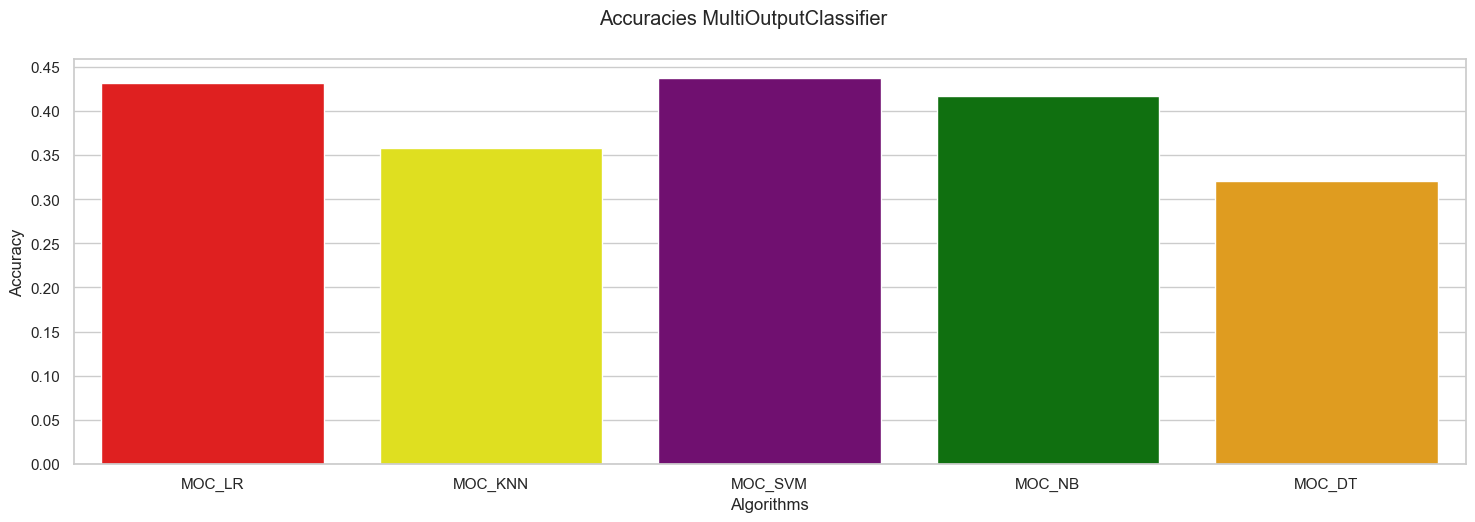

In [94]:
colors = ["red", "yellow", "purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.suptitle('Accuracies MultiOutputClassifier ')
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(accuracies_MOC.keys()), y=list(accuracies_MOC.values()), palette=colors)
plt.show()

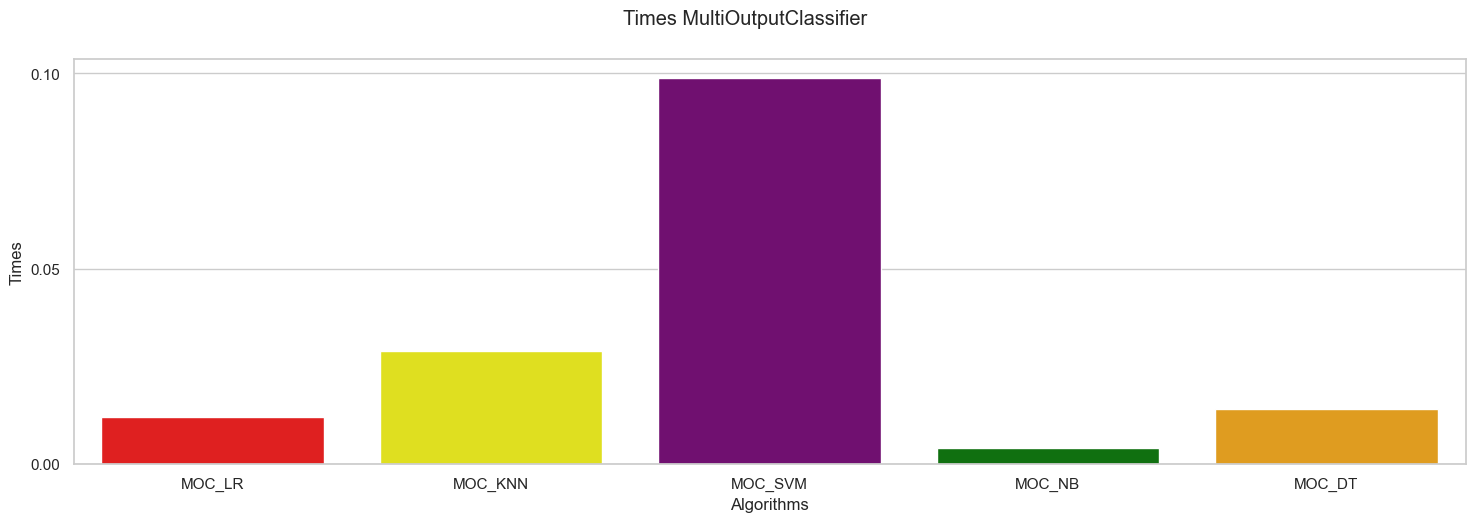

In [95]:
colors = ["red", "yellow", "purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.suptitle('Times MultiOutputClassifier')
plt.ylabel("Times")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(times_MOC.keys()), y=list(times_MOC.values()), palette=colors)
plt.show()

In [96]:
accuracies_CC

{'CC_LR': 0.4250,
 'CC_KNN': 0.3583,
 'CC_SVM': 0.4267,
 'CC_NB': 0.4017,
 'CC_DT': 0.3983}

In [97]:
times_CC 

{'CC_LR': 0.0120,
 'CC_KNN': 0.0289,
 'CC_SVM': 0.0957,
 'CC_NB': 0.0030,
 'CC_DT': 0.0110}

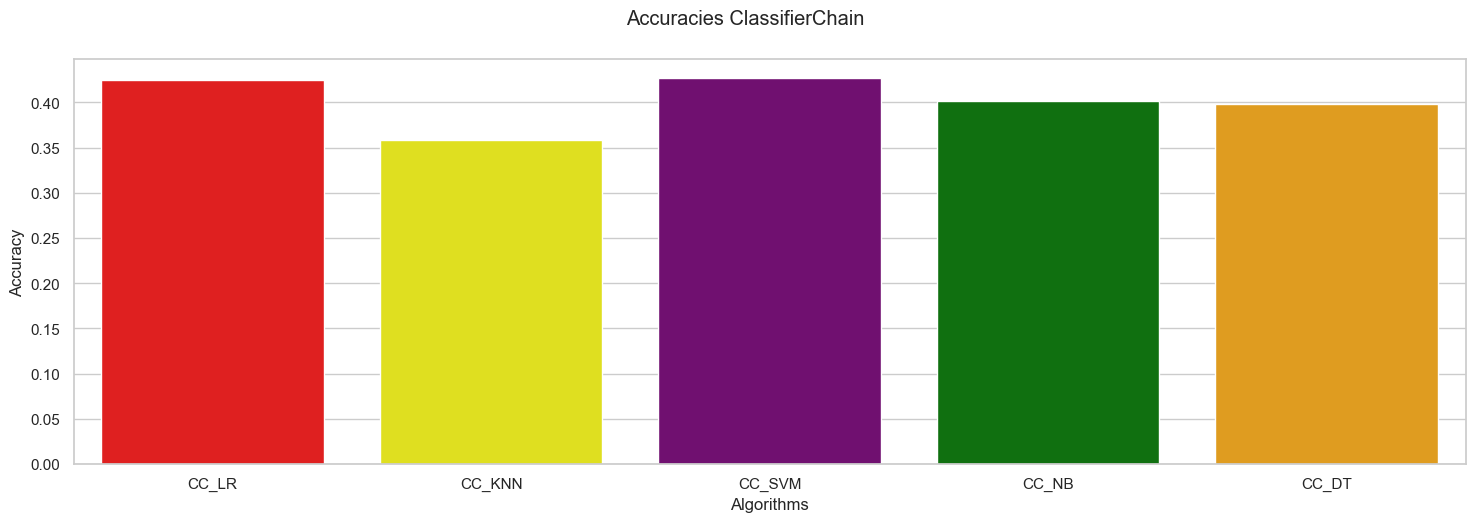

In [98]:
colors = ["red", "yellow", "purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.suptitle('Accuracies ClassifierChain')
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(accuracies_CC.keys()), y=list(accuracies_CC.values()), palette=colors)
plt.show()

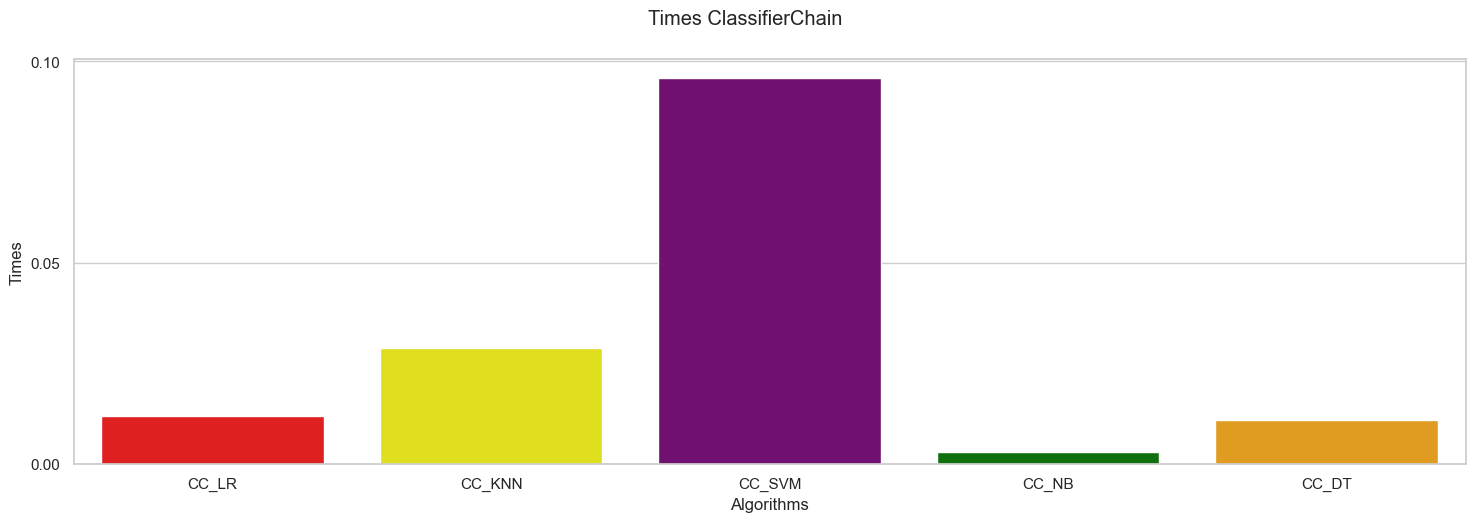

In [99]:
colors = ["red", "yellow", "purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.suptitle('Times ClassifierChain')
plt.ylabel("Times")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(times_CC.keys()), y=list(times_CC.values()), palette=colors)
plt.show()

### Выводы:

- Лучший результат по точности среди всех моделей у стратегии MultiOutputRegressor показал метод SVM.
- Лучший результат по времени среди всех моделей у стратегии MultiOutputRegressor показал метод Naive Bayes.
- Лучший результат по точности среди всех моделей у стратегии ClassifierChain показал метод SVM.
- Лучший результат по времени среди всех моделей у стратегии ClassifierChain показал метод Naive Bayes.
- Худший результат по точности среди всех моделей у стратегии MultiOutputRegressor показал метод Decision Tree.
- Худший результат по времени среди всех моделей у стратегии MultiOutputRegressor показал метод SVM.
- Худший результат по точности среди всех моделей у стратегии ClassifierChain показал метод Naive Bayes.
- Худший результат и времени среди всех моделей у стратегии ClassifierChain показал метод SVM.

## (+2 балла) Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2.

In [100]:
y = df[["px_width", "px_height"]]
x = df.drop(columns=["px_width", "px_height"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [101]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## MultiOutputRegressor

In [131]:
r2_score_R = {}
times_R = {}

In [132]:
from sklearn.multioutput import MultiOutputRegressor

###  Ridge

In [133]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)


search = GridSearchCV(Ridge(), grid, scoring='r2', cv=5, n_jobs=-1)

results = search.fit(x_train_scaled, y_train)

print('Config: %s' % results.best_params_)

Config: {'alpha': 0.0}


In [134]:
moc_lr = MultiOutputRegressor(search)
start_time = time.time()
moc_lr.fit(x_train_scaled, y_train)
moc_lr_prediction = moc_lr.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'MOR_Ridge r2_score: {r2_score(y_test, moc_lr_prediction)}')
print(f'MOR_Ridge time: {spend_time}')
r2_score_R['MOR_Ridge'] = r2_score(y_test, moc_lr_prediction)
times_R["MOR_Ridge"] = spend_time

MOR_Ridge r2_score: 0.24949310004321956
MOR_Ridge time: 0.3341057300567627


## RegressorChain

In [135]:
from sklearn.multioutput import RegressorChain

###  Ridge

In [136]:
rc_lr = RegressorChain(search)
start_time = time.time()
rc_lr.fit(x_train_scaled, y_train)
rc_lr_prediction = rc_lr.predict(x_test_scaled)
spend_time = time.time() - start_time

print(f'RC_Ridge r2_score: {r2_score(y_test, rc_lr_prediction)}')
print(f'RC_Ridge time: {spend_time}')
r2_score_R['RC_Ridge'] = r2_score(y_test, rc_lr_prediction)
times_R["RC_Ridge"] = spend_time

RC_Ridge r2_score: 0.2495084791262034
RC_Ridge time: 0.34558749198913574


In [137]:
r2_score_MOR

{'MOR_Ridge': 0.2495, 'RC_Ridge': 0.2495}

In [138]:
times_MOR 

{'MOR_Ridge': 0.3396, 'RC_Ridge': 0.3590}

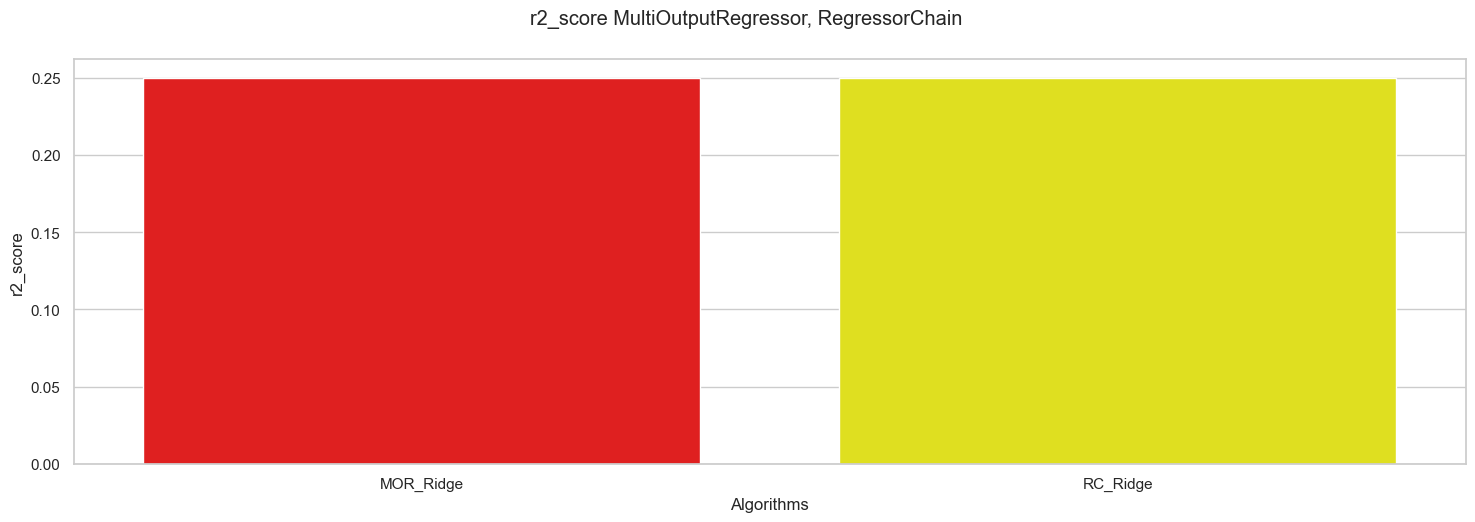

In [142]:
plt.figure(figsize=(16, 5))
plt.suptitle('r2_score MultiOutputRegressor, RegressorChain')
plt.ylabel("r2_score")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(r2_score_MOR.keys()), y=list(r2_score_MOR.values()), palette=colors)
plt.show()

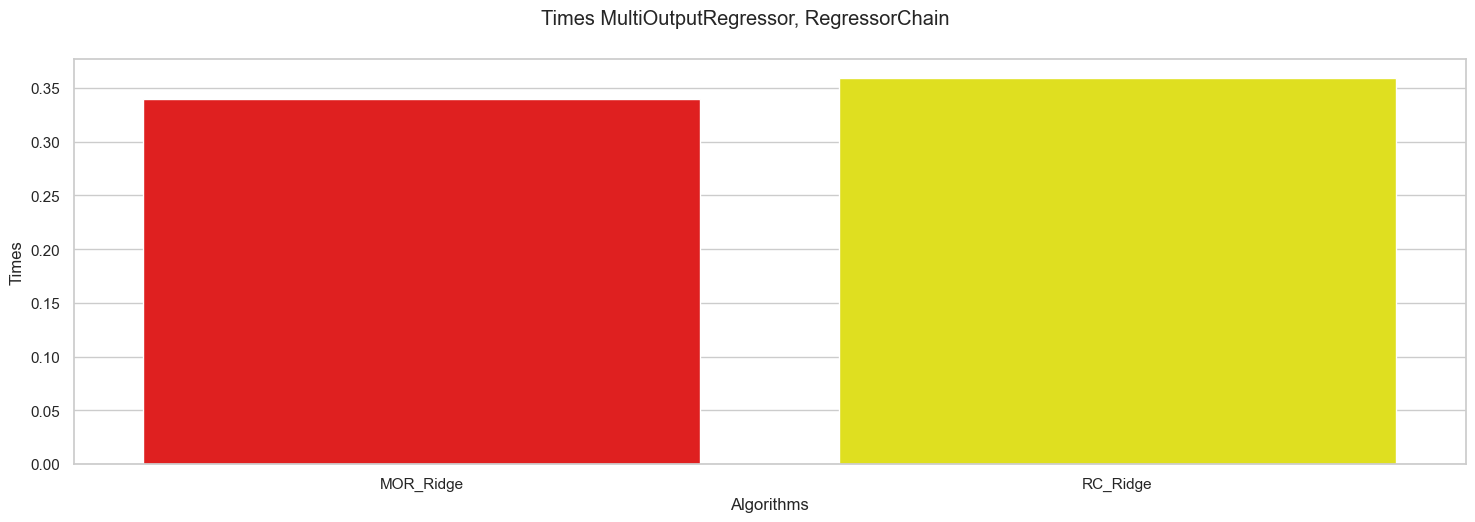

In [143]:
plt.figure(figsize=(16, 5))
plt.suptitle('Times MultiOutputRegressor, RegressorChain')
plt.ylabel("Times")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(times_MOR.keys()), y=list(times_MOR.values()), palette=colors)
plt.show()

- Cтатегии MultiOutputRegressor и RegressorChain показали примерно одинаковый результат как по точности, так и по времени обучения